# page in construction, please do not look if you are not adventureous !!

Blah blah blah


Emphasis, aka italics, with *asterisks* or _underscores_.

Strong emphasis, aka bold, with **asterisks** or __underscores__.

Combined emphasis with **asterisks and _underscores_**.

Strikethrough uses two tildes. ~~Scratch this.~~

[I'm an inline-style link](https://www.google.com)

[I'm an inline-style link with title](https://www.google.com "Google's Homepage")

[I'm a reference-style link][Arbitrary case-insensitive reference text]

[I'm a relative reference to a repository file](../blob/master/LICENSE)

[You can use numbers for reference-style link definitions][1]

Or leave it empty and use the [link text itself].

URLs and URLs in angle brackets will automatically get turned into links. 
http://www.example.com or <http://www.example.com> and sometimes 
example.com (but not on Github, for example).

Some text to show that the reference links can follow later.

[arbitrary case-insensitive reference text]: https://www.mozilla.org
[1]: http://slashdot.org
[link text itself]: http://www.reddit.com
Here's our logo (hover to see the title text):

Inline-style: 
![alt text](https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 1")

Reference-style: 
![alt text][logo]

[logo]: https://github.com/adam-p/markdown-here/raw/master/src/common/images/icon48.png "Logo Title Text 2"

Inline `code` has `back-ticks around` it.

```javascript
var s = "JavaScript syntax highlighting";
alert(s);
```
 
```python
s = "Python syntax highlighting"
print s
```
 
```
No language indicated, so no syntax highlighting. 
But let's throw in a <b>tag</b>.
```


Colons can be used to align columns.

| Tables        | Are           | Cool  |
| ------------- |:-------------:| -----:|
| col 3 is      | right-aligned | $1600 |
| col 2 is      | centered      |   $12 |
| zebra stripes | are neat      |    $1 |

There must be at least 3 dashes separating each header cell.
The outer pipes (|) are optional, and you don't need to make the 
raw Markdown line up prettily. You can also use inline Markdown.

Markdown | Less | Pretty
--- | --- | ---
*Still* | `renders` | **nicely**
1 | 2 | 3

> Blockquotes are very handy in email to emulate reply text.
> This line is part of the same quote.

Quote break.

> This is a very long line that will still be quoted properly when it wraps. Oh boy let's keep writing to make sure this is long enough to actually wrap for everyone. Oh, you can *put* **Markdown** into a blockquote. 


<!-- TEASER_END -->

Let's first initialize the notebook:

In [1]:
from __future__ import division, print_function
import numpy as np
np.set_printoptions(precision=6, suppress=True)
import os
%matplotlib inline
#%config InlineBackend.figure_format='retina'
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
phi = (np.sqrt(5)+1)/2
fig_width = 10
figsize = (fig_width, fig_width/phi)
from IPython.display import display, HTML
def show_video(filename): 
    return HTML(data='<video src="{}" loop autoplay width="600" height="600"></video>'.format(filename))
%load_ext autoreload
%autoreload 2


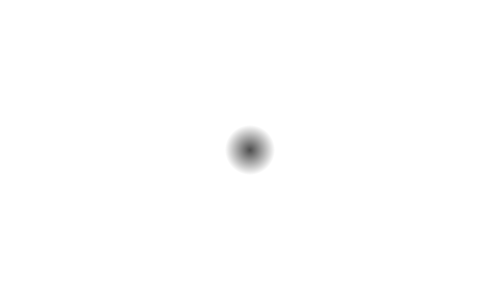

In [2]:
import gizeh as gz
W, H = 500, 300
r, gray, t = 25., .3, 1.

surface = gz.Surface(W,H, bg_color=(1, 1, 1)) # white background
gradient = gz.ColorGradient(type="radial", stops_colors=[(0,(gray, gray, gray)), (1, (1, 1, 1))],
                            xy1=[0, 0], xy2=[0, 0], xy3=[0, r])
rf = gz.circle(r=r, xy=(W/2., H/2.), fill=gradient)
#rect = gz.rectangle(lx=.3*H, ly=.02*H, xy=(W*t/duration, H/2.), fill=(0,1,0), angle=np.pi/2)

rf.draw(surface)
surface.ipython_display()

## The flash-lag clock

And now the animation for the straight trajectory of a segment with perpendicular orientation:

In [3]:
import numpy as np
import gizeh as gz
import moviepy.editor as mpy

W, H = 1000, 600
duration = 1

figpath = '/tmp/'
fps = 60

fix = gz.circle(r=5, xy=(W/2., H/2.), fill=(1, 0, 0))

def make_frame(t):

    surface = gz.Surface(W, H, bg_color=(0, 0, 0))
    
    # rect = gz.rectangle(lx=.3*H, ly=.02*H, xy=(W*t/duration, H/2.), fill=(0,1,0), angle=np.pi/2)
    # modul = 1 - .2*np.sin(2*np.pi*t/duration)
    # ymodul = 1 + .2*(np.cos(2*np.pi*t/duration)+1)
    lx = .4*H
    for theta in np.linspace(0, 2*np.pi, 50, endpoint=False):
        gray = .1
        rect = gz.rectangle(lx=lx, ly=2, xy=(W/2.+lx/2*np.cos(theta), H/2.+lx/2*np.sin(theta)), fill=(gray, gray, gray), angle=theta)
        rect.draw(surface)

    pastille = gz.circle(r=25, xy=(W/2., H/2.), fill=(0, 0, 0))
        
    theta = 2*np.pi*t/duration + np.pi
    rect = gz.rectangle(lx=lx, ly=2, xy=(W/2.+lx/2*np.cos(theta), H/2.+lx/2*np.sin(theta)), fill=(0,1,0), angle=theta)
    rect.draw(surface)
    if np.abs(np.sin(.5*(theta+np.pi/2))) < np.sin(np.pi/64):
        # print (theta, np.abs(np.tan(theta)), np.tan(np.pi/32), np.abs(np.tan(theta)) < np.tan(np.pi/32))
        print ('flash for ', theta)
        flash = gz.circle(r=5, xy=(W/2., H/2. - .48*H), fill=(1, 0, 0))
        flash.draw(surface)
    pastille.draw(surface)
    fix.draw(surface)
    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
#clip.write_videofile(figpath + 'clock.mp4', fps=fps) # Many options...

clip.ipython_display(fps=fps, width=W, autoplay=True, loop=True)

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


t:   5%|▌         | 3/60 [00:00<00:02, 27.73it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:  32%|███▏      | 19/60 [00:00<00:01, 28.27it/s, now=None]

flash for  4.71238898038469


Moviepy - Done !
Moviepy - video ready __temp__.mp4


## avec un flash trait

In [4]:
def make_frame(t):

    surface = gz.Surface(W, H, bg_color=(0, 0, 0))

    lx = .4*H
    for theta in np.linspace(0, 2*np.pi, 50, endpoint=False):
        gray = .1
        rect = gz.rectangle(lx=lx, ly=2, xy=(W/2.+lx/2*np.cos(theta), H/2.+lx/2*np.sin(theta)), fill=(gray, gray, gray), angle=theta)
        rect.draw(surface)

    pastille = gz.circle(r=25, xy=(W/2., H/2.), fill=(0, 0, 0))
        
    theta = 2*np.pi*t/duration + np.pi
    rect = gz.rectangle(lx=lx, ly=2, xy=(W/2.+lx/2*np.cos(theta), H/2.+lx/2*np.sin(theta)), fill=(0,1,0), angle=theta)
    rect.draw(surface)
    if np.abs(np.sin(.5*(theta+np.pi/2))) < np.sin(np.pi/64):
        print ('flash for theta=', theta, ', t=', t)
        flash = gz.rectangle(lx=.06*H, ly=2, xy=(W/2., H/2. - .47*H), fill=(1, 0, 0), angle=np.pi/2)
        flash.draw(surface)
    pastille.draw(surface)
    fix.draw(surface)
    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
#clip.write_videofile(figpath + 'clock.mp4', fps=fps) # Many options...

clip.ipython_display(fps=fps, width=W, autoplay=True, loop=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:  30%|███       | 18/60 [00:02<00:04,  9.11it/s, now=None]

flash for theta= 4.71238898038469 , t= 0.25


Moviepy - Done !
Moviepy - video ready __temp__.mp4


## avec plusieurs flash trait

In [8]:
duration = 3

def make_frame(t):

    surface = gz.Surface(W, H, bg_color=(0, 0, 0))
    lx = .4*H
    
    for theta in np.linspace(0, 2*np.pi, 50, endpoint=False):
        gray = .1
        rect = gz.rectangle(lx=lx, ly=2, xy=(W/2.+lx/2*np.cos(theta), H/2.+lx/2*np.sin(theta)), fill=(gray, gray, gray), angle=theta)
        rect.draw(surface)

    pastille = gz.circle(r=25, xy=(W/2., H/2.), fill=(0, 0, 0))
    N_spikes = 5
    for theta_ in np.linspace(0, 2*np.pi, N_spikes, endpoint=False):
        theta = 2*np.pi*t/duration + np.pi + theta_
        rect = gz.rectangle(lx=lx, ly=2, xy=(W/2.+lx/2*np.cos(theta), H/2.+lx/2*np.sin(theta)), fill=(0,1,0), angle=theta)
        rect.draw(surface)
        
        #if np.abs(np.cos(np.pi*(t/duration-.5)*N_spikes)) > np.cos(np.pi/32):
        if np.abs(np.sin(N_spikes*(theta_-theta)/2)) < np.sin(np.pi/64):
            print ('flash for theta=', theta, ', t=', t)
            flash = gz.rectangle(lx=.06*H, ly=5, xy=(W/2. + .47*H*np.cos(theta_), H/2. - .47*H*np.sin(theta_)), fill=(1, 0, 0), 
                                 angle=-theta_)
            flash.draw(surface)
        
    pastille.draw(surface)
    fix.draw(surface)
    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
clip.write_videofile(figpath + 'clock.mp4', fps=fps) # Many options...

clip.ipython_display(fps=fps, width=W, autoplay=True, loop=True)

t:   0%|          | 0/180 [00:00<?, ?it/s, now=None]

Moviepy - Building video /tmp/clock.mp4.
Moviepy - Writing video /tmp/clock.mp4



t:  13%|█▎        | 23/180 [00:02<00:10, 15.30it/s, now=None]

flash for theta= 3.7699111843077517 , t= 0.3
flash for theta= 5.026548245743669 , t= 0.3
flash for theta= 6.283185307179586 , t= 0.3
flash for theta= 7.5398223686155035 , t= 0.3
flash for theta= 8.79645943005142 , t= 0.3


t:  33%|███▎      | 59/180 [00:04<00:06, 19.81it/s, now=None]

flash for theta= 5.026548245743669 , t= 0.9
flash for theta= 6.283185307179586 , t= 0.9
flash for theta= 7.5398223686155035 , t= 0.9
flash for theta= 8.79645943005142 , t= 0.9
flash for theta= 10.053096491487338 , t= 0.9


t:  54%|█████▍    | 97/180 [00:06<00:03, 22.57it/s, now=None]

flash for theta= 6.283185307179586 , t= 1.5
flash for theta= 7.5398223686155035 , t= 1.5
flash for theta= 8.79645943005142 , t= 1.5
flash for theta= 10.053096491487338 , t= 1.5
flash for theta= 11.309733552923255 , t= 1.5


t:  72%|███████▏  | 130/180 [00:07<00:01, 25.86it/s, now=None]

flash for theta= 7.5398223686155035 , t= 2.1
flash for theta= 8.79645943005142 , t= 2.1
flash for theta= 10.053096491487338 , t= 2.1
flash for theta= 11.309733552923255 , t= 2.1
flash for theta= 12.566370614359172 , t= 2.1


t:  93%|█████████▎| 167/180 [00:08<00:00, 30.53it/s, now=None]

flash for theta= 8.79645943005142 , t= 2.7
flash for theta= 10.053096491487338 , t= 2.7
flash for theta= 11.309733552923255 , t= 2.7
flash for theta= 12.566370614359172 , t= 2.7
flash for theta= 13.82300767579509 , t= 2.7


t:   2%|▏         | 3/180 [00:00<00:06, 27.51it/s, now=None]  

Moviepy - Done !
Moviepy - video ready /tmp/clock.mp4
Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



t:  14%|█▍        | 25/180 [00:00<00:05, 30.66it/s, now=None]

flash for theta= 3.7699111843077517 , t= 0.3
flash for theta= 5.026548245743669 , t= 0.3
flash for theta= 6.283185307179586 , t= 0.3
flash for theta= 7.5398223686155035 , t= 0.3
flash for theta= 8.79645943005142 , t= 0.3


t:  33%|███▎      | 60/180 [00:01<00:03, 32.61it/s, now=None]

flash for theta= 5.026548245743669 , t= 0.9
flash for theta= 6.283185307179586 , t= 0.9
flash for theta= 7.5398223686155035 , t= 0.9
flash for theta= 8.79645943005142 , t= 0.9
flash for theta= 10.053096491487338 , t= 0.9


t:  53%|█████▎    | 96/180 [00:03<00:02, 32.94it/s, now=None]

flash for theta= 6.283185307179586 , t= 1.5
flash for theta= 7.5398223686155035 , t= 1.5
flash for theta= 8.79645943005142 , t= 1.5
flash for theta= 10.053096491487338 , t= 1.5
flash for theta= 11.309733552923255 , t= 1.5


t:  72%|███████▏  | 130/180 [00:04<00:01, 25.73it/s, now=None]

flash for theta= 7.5398223686155035 , t= 2.1
flash for theta= 8.79645943005142 , t= 2.1
flash for theta= 10.053096491487338 , t= 2.1
flash for theta= 11.309733552923255 , t= 2.1
flash for theta= 12.566370614359172 , t= 2.1


t:  94%|█████████▍| 170/180 [00:05<00:00, 32.46it/s, now=None]

flash for theta= 8.79645943005142 , t= 2.7
flash for theta= 10.053096491487338 , t= 2.7
flash for theta= 11.309733552923255 , t= 2.7
flash for theta= 12.566370614359172 , t= 2.7
flash for theta= 13.82300767579509 , t= 2.7


Moviepy - Done !
Moviepy - video ready __temp__.mp4


## some book keeping for the notebook

In [ ]:
!rm __temp__.mp4

In [7]:
%load_ext watermark
%watermark

2019-09-26T23:49:57+02:00

CPython 3.7.4
IPython 7.8.0

compiler   : Clang 10.0.1 (clang-1001.0.46.4)
system     : Darwin
release    : 19.0.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit
